### Naive Bayes Training Script
#### Author: Austin Fernandez
#### Date Modified: April 25, 2020

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
def extract_data(filename,with_label=True):
    data = []    
    f = open(filename,"r")
    d_reader = csv.reader(f,delimiter=",",quotechar="\"")
    first = True
    for line in d_reader:
        if first:
            first = False
            continue
        data.append(line)
    print(np.shape(data))
    x_train = np.empty((0,340))
    y_train = np.array([])

    for line in data:
        if with_label:
            x_train = np.append(x_train,np.array(list(map(float,line[1:-2]))).reshape((1,340)),axis=0)
            y_train = np.append(y_train,int(line[-1]))
        else:
            x_train = np.append(x_train,np.array(list(map(float,line[1:6]+line[8:]))).reshape((1,340)),axis=0)
    print(x_train.shape)
    print(y_train.shape)
    if with_label:
        return x_train, y_train
    else:
        return x_train
    #print(y_train)

In [3]:
x_train, y_train = extract_data("TrainingSet (Labeled Only).csv")

(246, 343)
(246, 340)
(246,)


In [4]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(480, 339) (480,)
(480, 339) (480,)


In [5]:
"""
Trains a model using the given data and a hyperparameter search object

Parameters:
x_train - input data
y_train - target labels for data
hp_search - model_selection object

Returns: best estimator for the given data given the model selector
"""
def train_model(x_train,y_train,hp_search):
    hp_search.fit(x_train,y_train)
    print("Best Score: {:.4f}".format(hp_search.best_score_))
    for k,v in hp_search.best_params_.items():
        print("{} => {}".format(k,v))
    print("Splits: {}".format(hp_search.n_splits_))
    y_out = hp_search.predict(x_train)
    print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
    return hp_search.best_estimator_

In [6]:
"""
Trains and prints the result of the training and model selection.

Parameters:
name - name of the test run
x_train - input data
y_train - target labels for data
model_selector - model_selection object
"""
def print_res(name,x_train,y_train,model_selector):
    print("{}:".format(name))
    train_model(x_train,y_train,model_selector)

    # display confusion matrix
    disp = plot_confusion_matrix(model_selector, x_train, y_train,
                                 display_labels=["Calm","Cheerful","Bravery",\
                                                 "Fearful","Sadness","Love"],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    # print(y_out)

In [8]:
# GaussianNB, GridSearch
k_folds = 5

parameters = {
    'var_smoothing' : [j / np.power(10,x) for x in range(1,10) for j in range(1,10)]
}
cnb = GaussianNB()
grid_search_gaussian = GridSearchCV(cnb, parameters,cv=k_folds,n_jobs=-1)

Vanilla:
Best Score: 0.2129
var_smoothing => 0.9
Splits: 5
Accuracy: 31.0861%


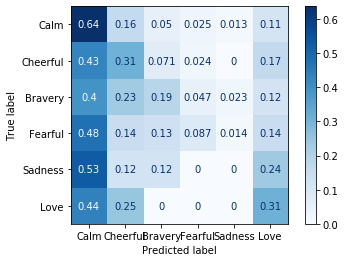

In [9]:
print_res("Vanilla",x_train,y_train,grid_search_gaussian)

Random Oversampling:
Best Score: 0.2438
var_smoothing => 0.0008
Splits: 5
Accuracy: 35.6250%


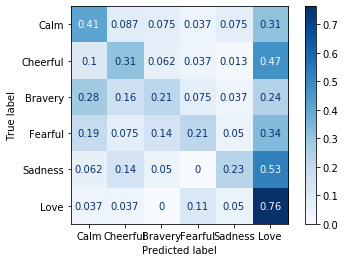

In [10]:
print_res("Random Oversampling",x_os,y_os,grid_search_gaussian)

SMOTE:
Best Score: 0.3062
var_smoothing => 1e-06
Splits: 5
Accuracy: 38.1250%


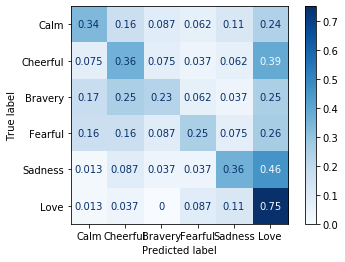

In [11]:
print_res("SMOTE",x_smote,y_smote,grid_search_gaussian)

In [12]:
# MultinomialNB, Grid Search
k_folds = 5
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False]
}
mnb = MultinomialNB()
grid_search_multinomial = GridSearchCV(mnb, parameters,cv=k_folds,n_jobs=-1)

Vanilla:
Best Score: 0.3409
alpha => 0.6900000000000001
fit_prior => True
Splits: 5
Accuracy: 37.8277%


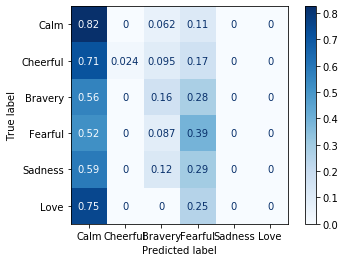

In [13]:
print_res("Vanilla",x_train,y_train,grid_search_multinomial)

Random Oversampling:
Best Score: 0.2521
alpha => 0.01
fit_prior => True
Splits: 5
Accuracy: 31.8750%


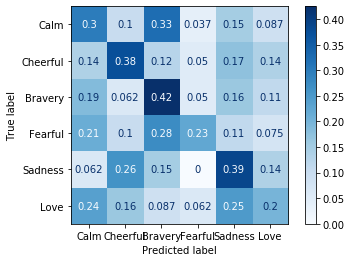

In [14]:
print_res("Random Oversampling",x_os,y_os,grid_search_multinomial)

SMOTE:
Best Score: 0.2500
alpha => 0.16
fit_prior => True
Splits: 5
Accuracy: 36.2500%


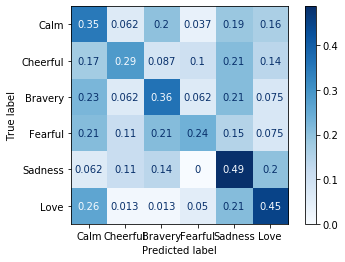

In [15]:
print_res("SMOTE",x_smote,y_smote,grid_search_multinomial)

In [33]:
# CategoricalNB, Grid Search
k_folds = 5
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False]
}
canb = CategoricalNB()
grid_search_categorical = GridSearchCV(canb, parameters,cv=k_folds)

Vanilla:
Best Score: 0.3407
alpha => 0.01
fit_prior => True
Splits: 5
Accuracy: 38.5768%


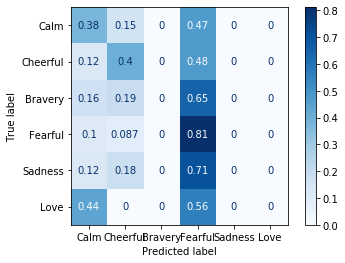

In [38]:
print_res("Vanilla",x_train[:,:5],y_train,grid_search_categorical)

Random Oversampling:
Best Score: 0.2500
alpha => 0.03
fit_prior => True
Splits: 5
Accuracy: 27.0833%


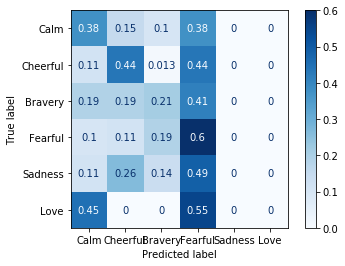

In [39]:
print_res("Random Oversampling",x_os[:,:5],y_os,grid_search_categorical)

SMOTE:
Best Score: 0.2646
alpha => 0.01
fit_prior => True
Splits: 5
Accuracy: 33.3333%


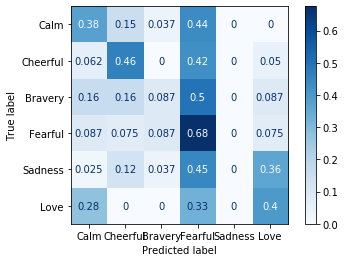

In [40]:
print_res("SMOTE",x_smote[:,:5],y_smote,grid_search_categorical)

In [20]:
# ComplementNB, Grid Search
k_folds = 5
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False], 
    'norm' : [True, False]}
cnb = ComplementNB()
grid_search_complement = GridSearchCV(cnb, parameters,cv=k_folds,n_jobs=-1)

Vanilla:
Best Score: 0.3184
alpha => 0.71
fit_prior => True
norm => False
Splits: 5
Accuracy: 37.4532%


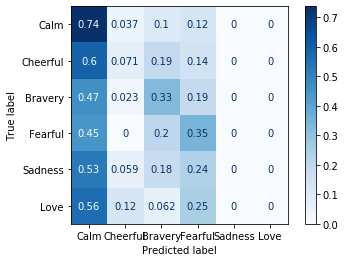

In [21]:
print_res("Vanilla",x_train,y_train,grid_search_complement)

Random Oversampling:
Best Score: 0.2333
alpha => 0.07
fit_prior => True
norm => False
Splits: 5
Accuracy: 31.4583%


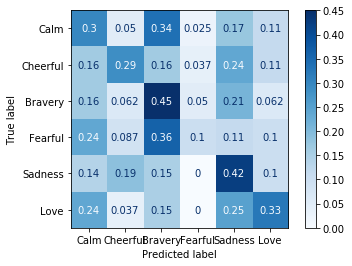

In [22]:
print_res("Random Oversampling",x_os,y_os,grid_search_complement)

SMOTE:
Best Score: 0.2354
alpha => 0.01
fit_prior => True
norm => False
Splits: 5
Accuracy: 35.2083%


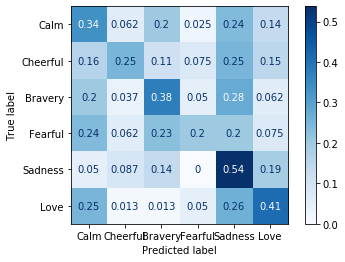

In [23]:
print_res("SMOTE",x_smote,y_smote,grid_search_complement)

In [24]:
# ComplementNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 5
rand_seed = 3249807

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False], 
    'norm' : [True, False]
}
cnb = ComplementNB()
random_search_complement = RandomizedSearchCV(cnb, parameters,cv=k_folds,\
                                              n_iter=random_search_iterations,\
                                              random_state=rand_seed,n_jobs=-1)

Vanilla:
Best Score: 0.3184
alpha => 0.9007593155941124
fit_prior => False
norm => False
Splits: 5
Accuracy: 37.4532%


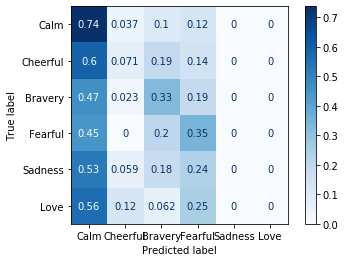

In [25]:
print_res("Vanilla",x_train,y_train,random_search_complement)

Random Oversampling:
Best Score: 0.2333
alpha => 0.2557277072168217
fit_prior => False
norm => False
Splits: 5
Accuracy: 31.4583%


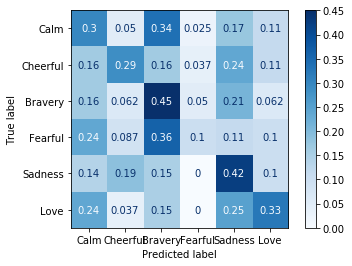

In [26]:
print_res("Random Oversampling",x_os,y_os,random_search_complement)

SMOTE:
Best Score: 0.2354
alpha => 0.0985373567512422
fit_prior => False
norm => False
Splits: 5
Accuracy: 35.2083%


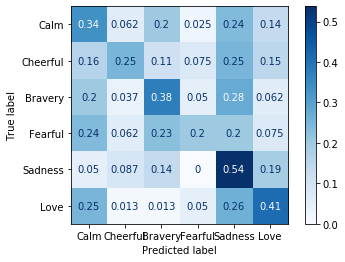

In [27]:
print_res("SMOTE",x_smote,y_smote,random_search_complement)

In [41]:
# CategoricalNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 5

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False]
}
canb = CategoricalNB()
random_search_categorical = RandomizedSearchCV(canb, parameters,cv=k_folds,\
                                           n_iter=random_search_iterations,\
                                            random_state=rand_seed)

Vanilla:
Best Score: 0.3407
alpha => 0.010145991301233392
fit_prior => True
Splits: 5
Accuracy: 38.5768%


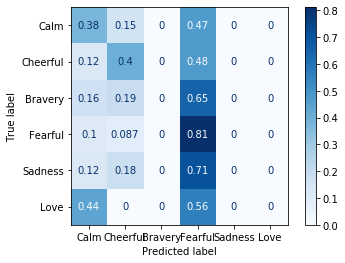

In [42]:
print_res("Vanilla",x_train[:,:5],y_train,random_search_categorical)

Random Oversampling:
Best Score: 0.2500
alpha => 0.2557277072168217
fit_prior => False
Splits: 5
Accuracy: 27.0833%


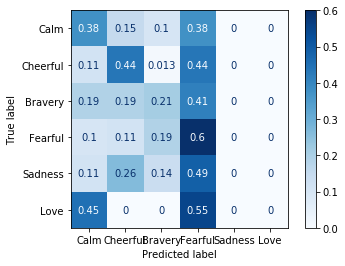

In [43]:
print_res("Random Oversampling",x_os[:,:5],y_os,random_search_categorical)

SMOTE:
Best Score: 0.2646
alpha => 0.010145991301233392
fit_prior => True
Splits: 5
Accuracy: 33.3333%


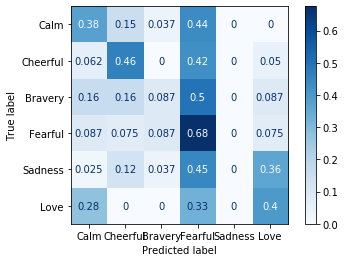

In [44]:
print_res("SMOTE",x_smote[:,:5],y_smote,random_search_categorical)

In [45]:
# MultinomialNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 5

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False]
}
mnb = MultinomialNB()
random_search_multinomial = RandomizedSearchCV(mnb, parameters,cv=k_folds,\
                                            n_iter=random_search_iterations,\
                                            random_state=rand_seed,n_jobs=-1)

Vanilla:
Best Score: 0.3409
alpha => 0.6887496278297602
fit_prior => True
Splits: 5
Accuracy: 37.8277%


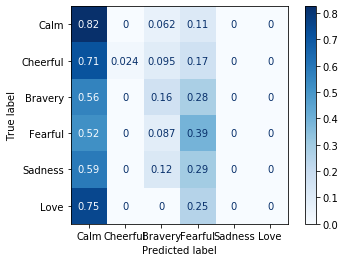

In [46]:
print_res("Vanilla",x_train,y_train,random_search_multinomial)

Random Oversampling:
Best Score: 0.2521
alpha => 0.010145991301233392
fit_prior => True
Splits: 5
Accuracy: 31.8750%


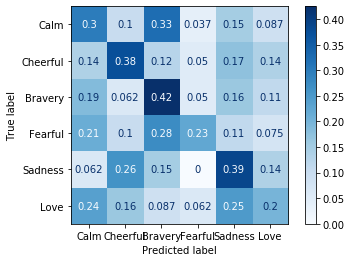

In [47]:
print_res("Random Oversampling",x_os,y_os,random_search_multinomial)

SMOTE:
Best Score: 0.2500
alpha => 0.16933829273046908
fit_prior => True
Splits: 5
Accuracy: 36.2500%


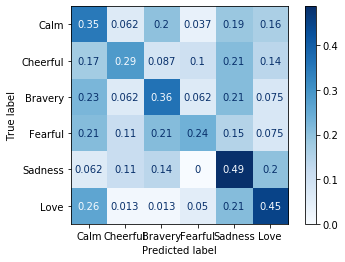

In [48]:
print_res("SMOTE",x_smote,y_smote,random_search_multinomial)